# Introdução à Programação em Python
## Notebook 04 - Programação recursiva
## Carlos Caleiro, Jaime Ramos
## Dep. Matemática, IST - 2016

(actualizado em 29 de Setembro de 2020)

# Recursão

É particularmente útil, na aprendizagem da programação, começar por compreender e dominar o paradigma de programação recursiva. Neste paradigma, pretende-se definir novas funções à custa de recorrências, ou seja, invocações da própria função sobre valores cada vez *mais simples*. É usual, portanto, que se explore a estrutura indutiva dos domínios de aplicação dos procedimentos.

## Recursão sobre números naturais

### Factorial

Considere-se o seguinte exemplo, que implementa a função factorial. Recorde-se que para um número natural $n$ se tem:

\begin{align*}
	n!&= 
	\begin{cases}
		1 & \mbox{ se } n=0,\\
		n.(n-1)!& \mbox{ caso contrário }.
	\end{cases}
\end{align*}

O módulo Math, incluído na extensão Pylab, que vimos anteriormente, já disponibiliza uma implementação.

In [3]:
from math import factorial as fact

In [5]:
fact(6)

720

Este facto não deve impedir-nos de programarmos a nossa própria definição. Isto é algo que faremos muitas vezes, não por razões de eficiência (a nossa definição será sempre menos eficiente que uma definição hiper-optimizada predefinida), mas por razões pedagógicas, até porque nalgum momento iremos com certeza necessitar de programar algo que de facto não está imediatamente disponível.

A implementação é muito simples, e em tudo semelhante à definição por casos que vimos acima.

In [36]:
def factorial(x):
    if x==0:
        return 1
    else: 
        return x*factorial(x-1)

In [8]:
factorial(7)

5040

Nas definições recursivas é frequente (e desejável) o uso de composições alternativas. Na definição acima o factorial de x (quando diferente de zero) é calculado recorrendo ao factorial de x-1, que por sua vez é calculado exactamente do mesmo modo. O caso base dá-se quando se atinge o valor 0. Esta recorrência é *bem fundada* sempre que x é um inteiro não-negativo, levando ao resultado desejado.

É útil recorrer à ferramenta <a href="http://www.pythontutor.com">Python Tutor</a> para melhor compreender a avaliação de expressões envolvendo definições recursivas.

In [1]:
from IPython.core.display import display, HTML
display(HTML('<iframe width="800" height="500" frameborder="0" src="https://pythontutor.com/iframe-embed.html#code=def+factorial(x%29%3A%0A++++if+x%3D%3D0%3A%0A++++++++return+1%0A++++else%3A+%0A++++++++return+x*factorial(x-1%29%0A++++++++%0Afactorial(4%29&origin=opt-frontend.js&cumulative=false&heapPrimitives=false&textReferences=false&py=3&rawInputLstJSON=%5B%5D&curInstr=0&codeDivWidth=350&codeDivHeight=400"> </iframe>'))

Emular a execução de programas, automaticamente ou manualmente, tem a enorme vantagem de nos ajudar a compreender o que de facto acontece quando um programa é executado, sendo extremamente útil na aprendizagem da programação, bem como na depuração de erros.

Claro que a recursão é um mecanismo bastante sensível, pelo que é muito fácil ocorrerem "problemas".

In [9]:
factorial(4.3)

RecursionError: maximum recursion depth exceeded in comparison

Por razões de eficiência, o sistema limita à partida a profundidade de uma cadeia de chamadas recursivas. Neste caso isso é de facto benéfico, pois corríamos o risco de esperar para sempre pelo resultado, já que esta chamada recursiva não é bem fundada. De todo o modo, se necessário, o limite de recursão pode ser alterado manualmente. 

In [16]:
import sys
sys.setrecursionlimit(5000)

À partida a disciplina de tipos da linguagem Python é relativamente permissiva, mas a robustez das nossas definições face a valores indesejados dos argumentos (*excepções*) pode ser garantida explicitamente de várias formas.

In [8]:
def factorial_robusto(x):
    if isinstance(x,int) and x>=0:
        return factorial(x)
    else:
        print("erro, factorial de argumento inválido")

In [9]:
factorial_robusto(5)

120

In [10]:
factorial_robusto(-7)

erro, factorial de argumento inválido


Outra solução, menos silenciosa mas igualmente eficaz, consiste na utilização da primitiva `assert`, que poderá ser também bastante útil na depuração de erros de programação.

In [11]:
def factorial_robusto2(x):
    assert isinstance(x,int) and x>=0
    return factorial(x)

In [12]:
factorial_robusto2(0)

1

In [13]:
factorial_robusto2(3.1)

AssertionError: 

Existem outros métodos para controlo de *excepções*, nomeadamente usando try-raise-except, que não abordaremos de momento. De todo o modo, por razões pedagógicas, estaremos em geral preocupados com a implementação de soluções correctas para os problemas colocados, muito mais do que com a robustez das soluções obtidas, e que pode sempre ser garantida a jusante.

### Exponenciação

Outro exemplo útil, que revisitaremos adiante, consiste na nossa própria definição de exponenciação. Como sabemos, se $x\neq 0$, tem-se:

\begin{align*}
	x^n&= 
	\begin{cases}
		1 & \mbox{ se } n=0,\\
		x.x^{n-1}& \mbox{ caso contrário }.
	\end{cases}
\end{align*}

In [26]:
def exponencial(x,n):
    assert x!=0
    if n==0:
        return 1
    else:
        return x*exponencial(x,n-1)

In [13]:
exponencial(0,10)

AssertionError: 

Claro que neste caso seria imediato usar as funções predefinidas da linguagem Python.

In [6]:
2**10

1024

### Máximo divisor comum

Mais um exemplo, particularmente importante, é o denominado *algoritmo de Euclides* (tecnologia com cerca de 2500 anos, infelizmente bem menos conhecida do que merecia) para o cálculo eficiente do máximo divisor comum entre dois números. A sua ideia básica assenta no facto de `mdc(a,b) = mdc(b,a%b)`. 
O caso base é atingido quando algum dos valores é zero.

In [17]:
def mdc(x,y):
    if x==0 or y==0:
        return x+y
    else:
        return mdc(y,x%y)

In [18]:
mdc(234,1108)

2

Vale a pena notar que o módulo Math inclui uma definição equivalente a esta (`gcd` - *greatest common divisor*).

## Recursão sobre listas

Para além dos números naturais, é possível explorar a estrutura indutiva de outros tipos para construir definições recursivas. É o caso óbvio das listas, que podemos destruir até ficarem vazias.

### Comprimento

Comecemos com um exemplo muito simples, o cálculo do comprimento de uma lista (obviamente sem usar `len`).

In [19]:
def compr(w):
    if w==[]:
        return 0
    else:
        return 1+compr(w[1:])

In [20]:
compr([4,5,6])

3

### Média

Queremos agora implementar uma função `media` que calcule o valor médio de uma lista de números. Claramente, será necessário calcular a soma dos elementos da lista. Para tal, definiremos uma função auxiliar, à custa da qual será muito simples calcular a média.

In [21]:
def somalista(w):
    if w==[]:
        return 0
    else:
        return w[0]+somalista(w[1:])
        

def media(w):
    if w==[]:
        print("erro, lista vazia")
    else:
        return somalista(w)/len(w)

In [22]:
media([1,2,4])

2.3333333333333335

É útil reflectir, a propósito destes últimos exemplos, em como determinar o valor do caso base de uma definição recursiva. Quer na definição de `compr`, quer agora em `somalista`, o valor de base é `0`. Já nas definições de `factorial` e de `exponenciação`, o valor de base é `1`. Por que será? Claramente, `compr` e `somalista` manipulam listas, enquanto `factorial` e `exponenciação` manipulam números, mas essa não é de todo a razão para esta discrepância. O que acontece é que enquanto `compr` e `somalista` são definições que acumulam o resultado por somas sucessivas, `factorial` e `exponenciação` acumulam o resultado por multiplicações sucessivas. Tipicamente, o valor do caso base corresponderá ao *elemento neutro* da operação utilizada para acumular o resultado pretendido. Vale a pena ter este facto em mente na construção das nossas definições.

### Lista dos naturais até n

Implementemos agora uma função `ate` que devolva a lista dos números naturais até um valor dado `n` (exclusive), que permita obter o mesmo efeito de `list(range(n))`.

In [1]:
def ate(n):
    if n==0:
        return []
    else: 
        return ate(n-1)+[n-1]

In [24]:
ate(10)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

### Lista de factoriais

Atentemos agora no seguinte problema, que enquadra uma situação típica em programação. Queremos, dada uma lista de valores naturais, calcular a lista dos seus factoriais (sem recorrer a definições por compreensão). 

In [25]:
def flista(w):
    if w==[]:
        return w
    else:
        return [factorial(w[0])]+flista(w[1:])

In [26]:
flista([5,7,10])

[120, 5040, 3628800]

### Prefixos

Consideremos agora o problema de determinar se uma dada lista é ou não *prefixo* de outra, ou seja, se a primeira lista é um segmento inicial da segunda lista. A ideia passa por garantir que cada um dos elementos da primeira lista é igual ao da segunda. Tratando-se uma função de resultado Booleano, dita um *predicado*, convencionamos dar-lhe um nome terminado por `Q`.  

In [27]:
def prefixoQ(t,T):
    if len(t)==0:
        return True
    elif len(T)==0:
        return False
    elif t[0]!=T[0]:
        return False
    else: 
        return prefixoQ(t[1:],T[1:])

In [28]:
prefixoQ([1,2,3],[1,2,3,4,5])

True

In [29]:
prefixoQ([2,3],[1,2,3,4,5])

False

### Quantificação em listas Booleanas

Outra situação recorrente ocorre quando queremos determinar, dada uma lista, se todos os elementos têm (ou algum elemento tem) uma certa propriedade. A propriedade em causa não é importante, podemos assumir apenas que é dada por algum predicado.

In [30]:
def todosQ(w,p):
    if len(w)==0:
        return True
    elif not(p(w[0])):
        return False
    else:
        return todosQ(w[1:],p)

In [2]:
def parQ(x):
    return x%2==0

todosQ([2,4,6],parQ)

True

In [32]:
def algumQ(w,p):
    if len(w)==0:
        return False
    elif p(w[0]):
        return True
    else:
        return algumQ(w[1:],p)

In [33]:
algumQ([1,3,5,7],parQ)

False

Podemos interpretar os valores dos casos base `True` para `todosQ` e `False` para `algumQ`, tal como já foi explicado antes, como os elementos neutros das operações que acumulam os resultados, respectivamente, `and` e `or`. Para clarificar, atente-se na seguinte definição alternativa de `todosQ`.

In [1]:
def todosQ(w,p):
    if len(w)==0:
        return True
    else:
        return p(w[0]) and todosQ(w[1:],p)

Deixa-se como exercício ao leitor a construção de uma definição alternativa similar de `algumQ`.

## Outros exemplos

Vale a pena praticar bastante a resolução de problemas, sendo na verdade a única verdadeira forma de aprender a programar. Para ajudar nesse esforço vale a pena percorrer a seguinte lista de exemplos, um pouco mais elaborados.

### Capicuas

Uma *capicua* é um número natural que se lê de igual modo da esquerda para a direita ou da direita para a esquerda. O conceito análogo, para palavras, é o de *palíndromo*. Começamos por definir um predicado `palindromoQ` que determina se uma lista de valores dada é ou não um palíndromo. Definimos ainda uma outra função auxiliar que extrai, dado um número natural, a lista dos seus dígitos. Torna-se simples, de seguida, definir o predicado `capicuaQ`.

In [34]:
def palindromoQ(w):
    if len(w)<2:
        return True
    elif w[0]!=w[-1]:
        return False
    else:
        return palindromoQ(w[1:len(w)-1])


def digitos(n):
    if n<10:
        return [n]
    else:
        return digitos(n//10)+[n%10]


def capicuaQ(n):
    return palindromoQ(digitos(n))

In [35]:
palindromoQ([True,True,False])

False

In [36]:
digitos(1073)

[1, 0, 7, 3]

In [37]:
capicuaQ(12321)

True

### Números primos

Pela sua importância, vale a pena implementar um teste de primalidade (naive, e portanto muito pouco eficiente). Há testes de primalidade eficientes, mas a sua compreensão exige alguns conhecimentos de *teoria algébrica dos números*. 
Aqui procuraremos apenas dividir o número em apreço por todos os que lhe são menores, em busca de um hipotético divisor.

In [1]:
def temdivisorQ(n,i,j):
    if i>j:
        return False
    elif n%i==0:
        return True
    else:
        return temdivisorQ(n,i+1,j)        

def primoQ(n):
    return n>1 and not(temdivisorQ(n,2,n-1))

In [2]:
primoQ(223)

True

Tirando partido da definção anterior podemos construir facilmente a lista dos primos menores que um dado valor.

In [3]:
def primosate(n):
    if n<3:
        return []
    elif primoQ(n-1):
        return primosate(n-1)+[n-1]
    else:
        return primosate(n-1)

In [4]:
primosate(111)

[2,
 3,
 5,
 7,
 11,
 13,
 17,
 19,
 23,
 29,
 31,
 37,
 41,
 43,
 47,
 53,
 59,
 61,
 67,
 71,
 73,
 79,
 83,
 89,
 97,
 101,
 103,
 107,
 109]

O mesmo efeito poderia ser obtido com uma definição por compreensão.

In [7]:
[n for n in ate(10) if primoQ(n)]

[2, 3, 5, 7]

Podemos ainda definir uma função que dado `n` nos devolve o `n`-ésimo primo. 

In [25]:
def primo(n):
    
    def proxprimos(i,k):
        if k==1 and primoQ(i):
            return i
        elif k>1 and primoQ(i):
            return proxprimos(i+1,k-1)
        else:
            return proxprimos(i+1,k)

    return proxprimos(2,n)

In [27]:
[primo(n+1) for n in ate(10)]

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29]

In [28]:
primo(100)

541

A definição de `primo` ilustra ainda uma outra possibilidade fundamental, visível na forma como se encaixou a definição da função auxiliar `proxprimos`, que se costuma designar por *encapsulamento*. Dentro de uma definição, todos os nomes (que não sejam declarados globais) têm carácter local. Assim sendo, a função auxiliar não tem de facto existência exterior à definição, o que evita o povoamento desnecessário do espaço de trabalho. 

In [45]:
?proxprimos

Object `proxprimos` not found.


### Pesquisa (ilimitada) de zero de uma sucessão

Também é útil, por vezes, a construção de recursões potencialmente mal fundadas. É o caso da seguinte definição, que dada uma sucessão $\{s_n\}_{n\in\mathbb{N}}$ procura o menor valor de $n$ tal que $s_n$ é zero (se existir).

In [19]:
def pesqzero(s):
    def tenta(n):
        if s(n)==0:
            return n
        else:
            return tenta(n+1)
    
    return tenta(0)

In [20]:
def sucessao1(n):
    return n-5

pesqzero(sucessao1)

5

In [21]:
from sympy import cos,pi

def sucessao2(n):
    return cos(n*pi/100)

pesqzero(sucessao2)

50

Como e óbvio, isto nem sempre dá bom resultado.

In [22]:
def sucessao3(n):
    return 1

pesqzero(sucessao3)

RecursionError: maximum recursion depth exceeded

### Posição dos dígitos

Considere-se o problema de dado um número real (com precisão arbitrária) determinar (se existir, claro) a posição em que um certo dígito ocorre, pela n-ésima vez na sua expansão decimal.

In [1]:
def nposdig(d,n,num):
    def contar(d,n,num,pos,i):
        if floor(num*(10**pos))%10==d:
            if i==n:
                return pos
            else:
                return contar(d,n,num,pos+1,i+1)
        else:
            return contar(d,n,num,pos+1,i)
    
    return contar(d,n,num,1,1)

In [2]:
from sympy import *
from mpmath import mp
mp.dps = 200
print(mp.fraction(3,7))

0.42857142857142857142857142857142857142857142857142857142857142857142857142857142857142857142857142857142857142857142857142857142857142857142857142857142857142857142857142857142857142857142857142857143


In [3]:
nposdig(4,3,mp.fraction(3,7))

13

In [4]:
print(mp.pi)

3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117067982148086513282306647093844609550582231725359408128481117450284102701938521105559644622948954930382


In [5]:
nposdig(9,1,mp.pi)

5

In [6]:
nposdig(9,20,mp.pi)

187

In [7]:
nposdig(1,1,10**-100)

100

## Técnicas de optimização de algoritmos

A algoritmia é o ramo da ciência da computação que estuda a eficiência de algoritmos. Existem diversas técnicas, mais ou menos gerais, para melhorar a eficiência dos programas que escrevemos. Vamos ver, sucintamente, as ideias por detrás de algumas dessas técnicas.

### Dividir para conquistar

Esta técnica *napoleónica* está por detrás de muitos dos melhores algoritmos existentes para diversos fins. Claro que a ideia da recursão é sempre a de reduzir o cálculo de uma função para determinados valores ao cálculo da mesma função para valores mais simples. No entanto, esta simplificação pode ser feita a várias velocidades. 

Atente-se na seguinte definição alternativa da função `exponencial` desenvolvida acima, mas em que, num só passo, se reduz o expoente a metade.

In [23]:
def sqrmult(x,e):
    if e==0:
        return 1
    elif (e%2)==0:
        return sqrmult(x*x,e/2)
    else:
        return x*sqrmult(x,e-1)

In [24]:
sqrmult(2,10)

1024

Note-se o ganho de eficiência, em termos de tempo, por se realizarem menos de 20 multiplicações, em vez de 1000.

In [27]:
%time exponencial(2,1000)

CPU times: user 664 µs, sys: 30 µs, total: 694 µs
Wall time: 671 µs


10715086071862673209484250490600018105614048117055336074437503883703510511249361224931983788156958581275946729175531468251871452856923140435984577574698574803934567774824230985421074605062371141877954182153046474983581941267398767559165543946077062914571196477686542167660429831652624386837205668069376

In [28]:
%time sqrmult(2,1000)

CPU times: user 19 µs, sys: 0 ns, total: 19 µs
Wall time: 24.1 µs


10715086071862673209484250490600018105614048117055336074437503883703510511249361224931983788156958581275946729175531468251871452856923140435984577574698574803934567774824230985421074605062371141877954182153046474983581941267398767559165543946077062914571196477686542167660429831652624386837205668069376

### Memoização

É sobejamente conhecida a sucessão de Fibonacci $\{F_n\}_{n\in\mathbb{N}}$ definida por:

\begin{align*}
	F_n&= 
	\begin{cases}
		1 & \mbox{ se } n=0 \mbox{ ou } n=1,\\
		F_{n-1}+F_{n-2}& \mbox{ caso contrário }.
	\end{cases}
\end{align*}


In [29]:
def fibonacci(n):
    if n<2:
        return 1
    else:
        return fibonacci(n-1)+fibonacci(n-2)

In [30]:
[fibonacci(i) for i in range(8)]

[1, 1, 2, 3, 5, 8, 13, 21]

Esta implementação é, no entanto, extremamente ineficiente.

In [31]:
%time fibonacci(20)

CPU times: user 3.33 ms, sys: 23 µs, total: 3.36 ms
Wall time: 3.38 ms


10946

In [32]:
%time fibonacci(35)

CPU times: user 4.6 s, sys: 9.41 ms, total: 4.61 s
Wall time: 4.61 s


14930352

A razão para esta ineficiência é simples: por exemplo, para calcular `fibonacci(35)` é necessário calcular `fibonacci(34)` e `fibonacci(33)`, mas o cálculo de `fibonacci(34)` também necessita de calcular `fibonacci(33)`, que é portanto calculado 2 vezes; é fácil perceber que então `fibonacci(32)` será calculado 3 vezes, `fibonacci(31)` será calculado 5 vezes e assim sucessivamente, dando origem a um processo (pior do que) exponencial.

A solução passa por refazer a definição de forma a que cada valor do factorial seja calculado não mais do que uma vez.

In [33]:
def fib2(n):
    
    def fibgo(a,b,k):
        if k==0:
            return a
        else:
            return fibgo(b,a+b,k-1)
        
    return fibgo(1,1,n)

In [34]:
%time fib2(100)

CPU times: user 79 µs, sys: 250 µs, total: 329 µs
Wall time: 333 µs


573147844013817084101

Esta ideia, que consiste em memorizar os valores intermédios necessários de forma a que não necessitem de ser recalculados é usualmente conhecida por *memoização*, tem um papel fundamental em técnicas de *programação dinâmica*.

Talvez ainda mais interessante é o exemplo que consiste no cálculo do valor máximo de uma lista de números. 

In [34]:
def maxlista(w):
    if w==[]:
        print("erro")
    elif len(w)==1:
        return w[0]
    elif w[0]>maxlista(w[1:]):
        return w[0]
    else:
        return maxlista(w[1:])

Esta definição funciona mas é extremamente ineficiente. Se usarmos $S_n$ para denotar o número máximo de vezes que é necessário comparar elementos da lista no cálculo da função é simples de verificar que $S_1=0$ e $S_{n+1}=1+2 S_n$. A sucessão tem os valores $0,1,3,7,15,31,63,\dots$ e facilmente se verifica que de facto $S_n=2^{n-1}-1$ cresce exponencialmente com $n$.

In [35]:
%time maxlista(ate(25))

CPU times: user 10.7 s, sys: 13 ms, total: 10.7 s
Wall time: 10.7 s


24

In [36]:
%time maxlista(ate(26))

CPU times: user 21 s, sys: 25.8 ms, total: 21 s
Wall time: 21 s


25

A solução óbvia consistiria em memorizar o valor de `maxlista(w[1:])` em vez de o recalcular, mas a consequente definição (que claramente funciona!) não seria, de facto, puramente recursiva (porquê?).

In [37]:
def max2(w):
    if w==[]:
        print("erro")
    elif len(w)==1:
        return w[0]
    else:
        x=max2(w[1:])
        if x>w[0]:
            return x
        else:
            return w[0]

In [39]:
%time max2(ate(26))

CPU times: user 31 µs, sys: 0 ns, total: 31 µs
Wall time: 35.8 µs


25

Se quisermos cingir-nos ao paradigma recursivo, uma solução simples passa por calcular o valor apenas uma vez passando-o como argumento a uma função auxiliar que o utiliza (as vezes que forem necessárias).

In [2]:
def max3(w):
    def maior(x,y):
        if x>y:
            return x
        else:
            return y
    
    if w==[]:
        print("erro")
    elif len(w)==1:
        return w[0]
    else:
        return maior(w[0],max3(w[1:]))

In [3]:
%time max3(ate(26))

CPU times: user 61 µs, sys: 1 µs, total: 62 µs
Wall time: 67.9 µs


25

In [5]:
%time max3(ate(260))

CPU times: user 1.22 ms, sys: 242 µs, total: 1.47 ms
Wall time: 1.47 ms


259

Outra solução, não menos interessante, passa por ir actualizando e transportando ao longo da computação o valor máximo dos elementos da lista que já foram analisados.

In [6]:
def max4(w):
    def maxparcial(u,m):
        if u==[]:
            return m
        elif u[0]>m:
            return maxparcial(u[1:],u[0])
        else:
            return maxparcial(u[1:],m)
    
    if w==[]:
        print("erro")
    else:
        return maxparcial(w[1:],w[0])

In [7]:
%time max4(ate(26))

CPU times: user 54 µs, sys: 1e+03 ns, total: 55 µs
Wall time: 60.1 µs


25

In [8]:
%time max3(ate(260))

CPU times: user 2.67 ms, sys: 1.26 ms, total: 3.93 ms
Wall time: 3.13 ms


259

### Iteração

As definições de `fib2` ou `max3` acima, têm outra característica fundamental: ambas dão origem a um processo a que é usual chamar de *iterativo* (*tail-recursion* em inglês). Isto significa que cada chamada recursiva é imediatamente resolvida, não tendo o sistema necessidade de alocar espaço de memória para armazenamento de cálculos intermédios. 

Toda a definição recursiva pode ser transformada, com alguma experiência, numa definição iterativa. Isto tem vantagens de eficiência (não totalmente patentes em Python, pois por opção dos seus autores não é disponibilizado um mecanismo de optimização para *tail-recursion* frequente noutras linguagens de programação), mas também conceptual. O mecanismo subjacente a esta transformação é o passo fundamental que necessitamos de dar para entrar noutro paradigma de programação: a *programação imperativa*.

A título de exemplo, considere-se a seguinte definição alternativa, iterativa, da função `factorial`.

In [9]:
def factorialiter(n):
    
    def factorialaux(i,r):
        if i==0:
            return r
        else:
            return factorialaux(i-1,r*i)
    
    return factorialaux(n,1)

A ideia essencial é a de conseguir fazer a definição com recurso a uma função auxiliar com argumentos adicionais, que usamos para transportar explicitamente os valores auxiliares necessários ao cálculo dos valores intermédios.

Atente-se em mais um exemplo, desta vez uma definição iterativa da função `flista`.

In [37]:
def flistaiter(w):
    
    def flistaaux(wfalta,wfeito):
        if wfalta==[]:
            return wfeito
        else:
            return flistaaux(wfalta[1:],wfeito+[factorial(wfalta[0])])
        
    return flistaaux(w,[])

Deixa-se como exercício encontrar implementações iterativas correspondentes a cada um dos exemplos trabalhados neste *notebook* (que não o sejam já, claro).

In [38]:
flistaiter([7,8,9])

[5040, 40320, 362880]

## Aplicação: programação probabilista

O uso de métodos probabilísticos em computação é bastante importante, e mesmo fundamental nalgumas aplicações, sendo abordado em disciplinas de *Algoritmia*. Voltaremos a este tema mais adiante, mas para já quer-se ilustrar a sua utilização no cálculo de uma aproximação da constante $\pi$ (usando um método muito simples de *Monte-Carlo*).

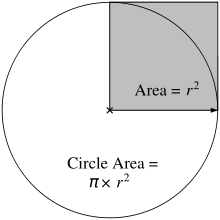

In [1]:
from IPython.display import Image
Image("pi1.png")

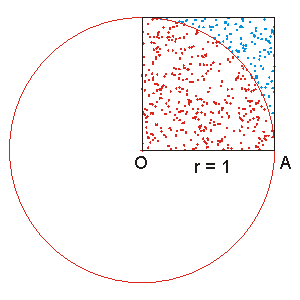

In [2]:
from IPython.display import Image
Image("pi2.png")

É claro que se escolhermos de forma aleatória uniforme N pontos no quadrado 1x1 e K deles estiverem dentro do quarto de círculo então 4K/N será uma aproximação (racional) razoável de $\pi$, que melhorará à medida que N aumenta. Podemos programar este método?

A primitiva `random` da extensão `random` dá-nos um valor (pseudo-)aleatório uniforme no intervalo [0, 1).

In [3]:
from random import random

In [4]:
random()

0.49093974003847074

In [5]:
random()

0.4035082212201775

Recursivamente, então, podemos fazer o seguinte.

In [6]:
def recpi(n):
    def hits(k):
        if k==0:
            return 0
        elif random()**2+random()**2<1:
            return 1+hits(k-1)
        else:
            return hits(k-1)                
    
    return 4*hits(n)/n

In [7]:
recpi(10)

3.2

In [8]:
recpi(100)

3.44

In [9]:
recpi(1000)

3.108

In [10]:
recpi(10000)

RecursionError: maximum recursion depth exceeded in comparison

In [12]:
import sys 
sys.setrecursionlimit(20000) 

In [13]:
recpi(10000)

3.1228

In [14]:
recpi(10000)

3.146

É também relativamente fácil obter uma solução iterativa.

In [15]:
def iterpi(n):
    def hits(c,i):
        if i==0:
            return c
        elif random()**2+random()**2<1:
            return hits(c+1,i-1)
        else:
            return hits(c,i-1)
            
    
    return 4*hits(0,n)/n

In [21]:
iterpi(10000)

3.1392

In [22]:
iterpi(10000)

3.1468

# Sumário

* A programação recursiva assenta num princípio básico da resolução de problemas: reduzir passo a passo cada problema a outro(s) mais simples, até chegar a casos básicos cuja solução seja imediata.
* A recursão tira partido, portanto, da estrutura indutiva dos valores do domínio das funções que se pretendem calcular.
* A concepção de algoritmos é uma tarefa criativa, que exige muita prática, mas que consiste essencialmente na boa compreensão do problema, na formulação mental da solução, e finalmente na respectiva codificação. 
* Sempre que necessário, devemos tornar os nossos programas robustos, resolvendo as excepções provocadas por argumentos com valores indesejados.
* É importante procurar soluções não apenas correctas mas também eficientes para os problemas que nos são colocados.

# Bibliografia

*Introdução à Programação em Mathematica* (3a edição): J. Carmo, A. Sernadas, C. Sernadas, F. M. Dionísio, C. Caleiro, IST Press, 2014.

*Think Python: How to think like a computer scientist*: A. Downey, Green Tea Press, 2012.

*Introduction to Computation and Programming Using Python* (revised and expanded edition): J. V. Guttag, MIT Press,  2013.

*The Art of Computer Programming*: D. E. Knuth, Addison-Wesley (volumes 1--3, 4A), 1998.

*Learning Python* (fifth edition): M. Lutz, O'Reilly Media,  2013.

*Programação em Python: Introdução à programação utilizando múltiplos paradigmas*: J. P. Martins, IST Press, 2015.

*Introdução à Programação em MatLab*: J. Ramos, A. Sernadas e P. Mateus, DMIST, 2005. 

*Learning IPython for Interactive Computing and Data Visualization*: C. Rossant, Packt Publishing,  2013.

*Programação em Mathematica*: A. Sernadas, C. Sernadas e J. Ramos, DMIST, 2003.